# FEATURES ENGINEERING - MATH

Mathematical features are essential components in quantitative trading, providing objective measures of price movements, volatility, and market dynamics. By leveraging mathematical transformations and indicators, traders can extract meaningful patterns and improve the predictive power of their models. In this notebook, we will implement key **math-based features** using the `quantreo` package to enhance data preprocessing and model performance.

In [1]:
# Import the Features Engineering Package from Quantreo
import quantreo.features_engineering as fe

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Show the data
df

,open,high,low,close,volume
time,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605
...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665


<br>

## **Derivatives**

The `derivatives` function computes the **first and second derivatives** of a given price series, representing **velocity** (rate of change) and **acceleration** (rate of velocity change), respectively. These metrics are essential for understanding **price momentum** and **curvature** in financial time series.

Given a price series $P_t$:

- **First derivative (Velocity):**  Measures the rate of change of the price over time. 
  
$$v_t = \frac{P_{t} - P_{t-1}}{\Delta t}$$

- **Second derivative (Acceleration):**  Captures the curvature, indicating whether the momentum is **increasing or decreasing**.

  
$$a_t = \frac{v_t - v_{t-1}}{\Delta t} = \frac{P_{t} - 2P_{t-1} + P_{t-2}}{\Delta t^2}$$


In [3]:
df["velocity"], df["acceleration"] = fe.math.derivatives(df=df, col="close")
df[["velocity", "acceleration"]]

,velocity,acceleration
time,,
2016-01-04 00:00:00,0.000000,0.000000
2016-01-04 04:00:00,-0.082932,-0.082932
2016-01-04 08:00:00,0.180949,0.263881
2016-01-04 12:00:00,-0.406903,-0.587852
2016-01-04 16:00:00,0.090943,0.497845
...,...,...
2016-12-30 04:00:00,-0.069464,-0.080966
2016-12-30 08:00:00,0.052157,0.121621
2016-12-30 12:00:00,-0.100885,-0.153042


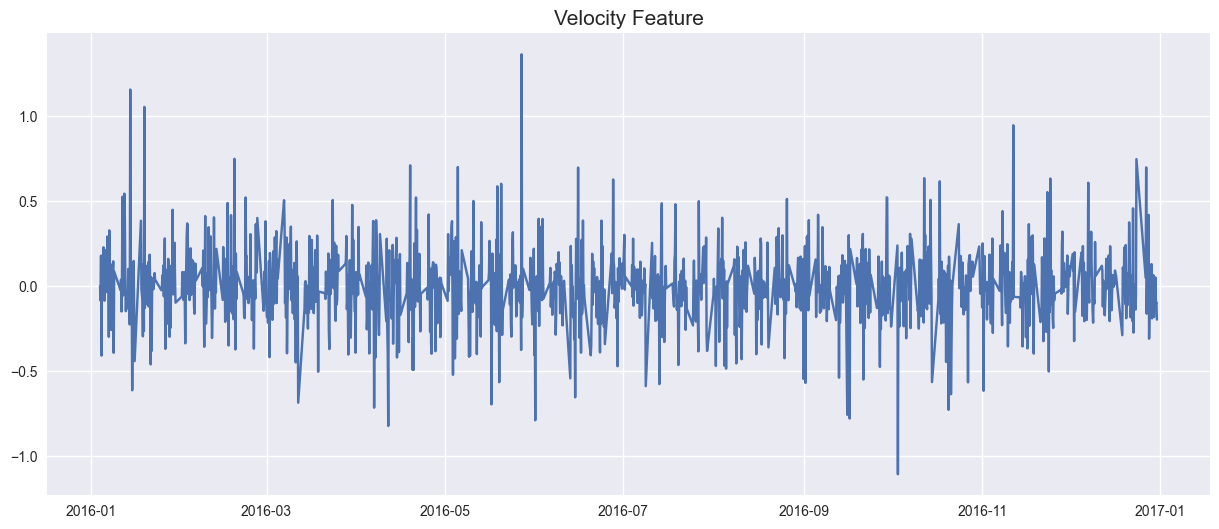

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df["velocity"])
plt.title("Velocity Feature", size=15)
plt.show()

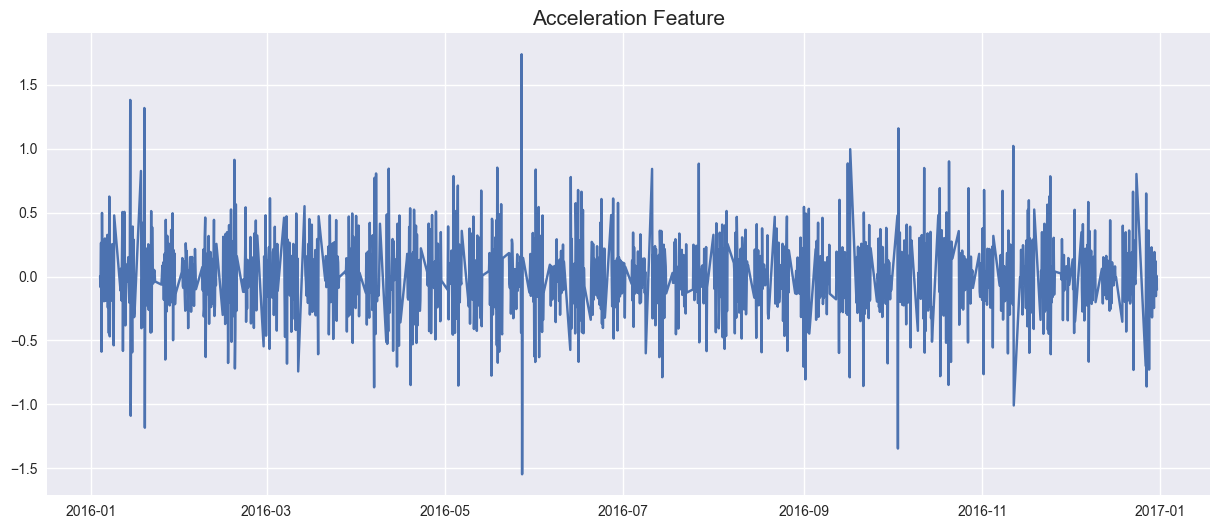

In [5]:
plt.figure(figsize=(15,6))
plt.plot(df["acceleration"])
plt.title("Acceleration Feature", size=15)
plt.show()

<br>

## **Logarithmic Percentage Change**

The `log_pct` function computes the **log return** over a specified window. Log returns are widely used in finance as they stabilize variance and make returns **time-additive**.

$$r_t  = \ln(P_t) - \ln(P_{t-n})$$

Where: $P_t$ is the price at time $t$ and $n$ is the window size.

In [7]:
df["log_pct"] = fe.math.log_pct(df=df, col="close", window_size=30)

df["log_pct"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.001161
2016-12-30 08:00:00    0.001422
2016-12-30 12:00:00    0.001643
2016-12-30 16:00:00    0.000484
2016-12-30 20:00:00    0.000646
Name: log_pct, Length: 1548, dtype: float64

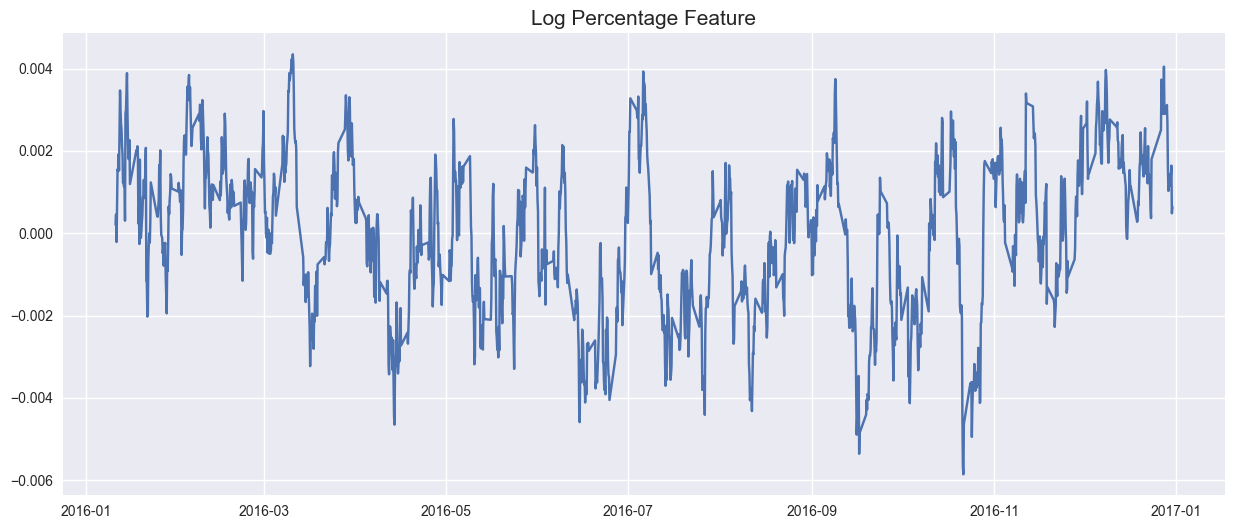

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df["log_pct"])
plt.title("Log Percentage Feature", size=15)
plt.show()

<br>

## **Auto Correlation**

The `auto_corr` function computes the **rolling autocorrelation** of a given column over a specified window. Autocorrelation measures how strongly a time series value is related to its **past values** at a given lag. For now, we use the following method only (`Pearson`correlation)

$$
r_k = \frac{\sum_{t=1}^{N-k} (X_t - \bar{X})(X_{t+k} - \bar{X})}{\sum_{t=1}^{N} (X_t - \bar{X})^2}
$$

Where $X_t$ is the value at time $t$, $k$ is the lag,  $N$ is the rolling window size.


In [10]:
df["auto_corr"] = fe.math.auto_corr(df=df, col="close", window_size=50, lag=10)
df["auto_corr"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.454313
2016-12-30 08:00:00    0.425926
2016-12-30 12:00:00    0.388406
2016-12-30 16:00:00    0.342590
2016-12-30 20:00:00    0.284411
Name: auto_corr, Length: 1548, dtype: float64

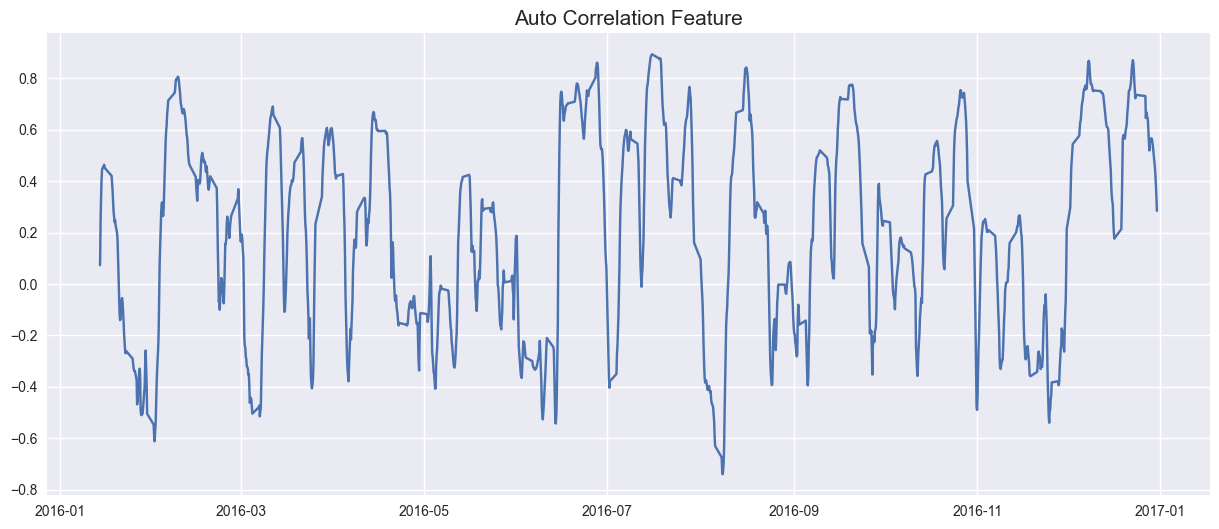

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df["auto_corr"])
plt.title("Auto Correlation Feature", size=15)
plt.show()

<br>

## **Hurst**
The `hurst` function computes the **Hurst exponent** over a rolling window. The Hurst exponent is a **measure of long-term memory** in time series data, helping to classify a series as **mean-reverting, random, or trending**.


The Hurst exponent is estimated using **rescaled range analysis**:

$$
H = \frac{\log(R/S)}{\log(n)}
$$

Where $R$ is the range of the cumulative deviations, $S$ is the standard deviation, $n$ is the window size.

In [12]:
df["hurst"] = fe.math.hurst(df=df, col="close", window_size=200)
df["hurst"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.622430
2016-12-30 08:00:00    0.647859
2016-12-30 12:00:00    0.641063
2016-12-30 16:00:00    0.650008
2016-12-30 20:00:00    0.654192
Name: hurst, Length: 1548, dtype: float64

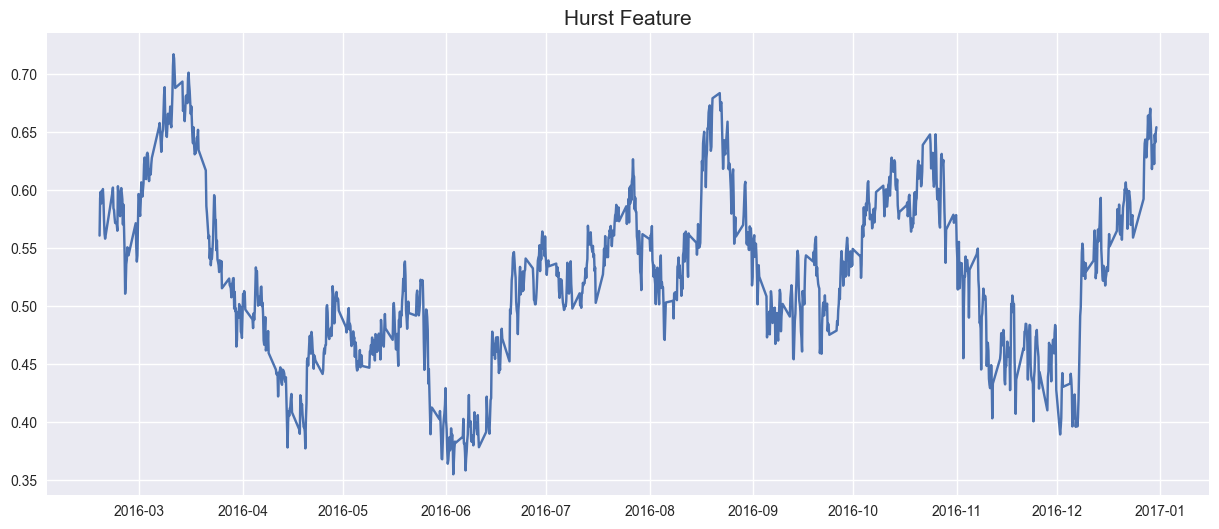

In [13]:
plt.figure(figsize=(15,6))
plt.plot(df["hurst"])
plt.title("Hurst Feature", size=15)
plt.show()